In [1]:
import math
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

#plt.rcParams["figure.figsize"] = [16, 12]


In [7]:
# import package with helper functions 
#import bq_helper

# create a helper object for this dataset
#baseball = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
#                                   dataset_name="baseball")

# print all the tables in this dataset (there's only one!)
#baseball.list_tables()

In [5]:
#from google.cloud import bigquery
#from bq_helper import BigQueryHelper

In [2]:
# Read the Data Set

games_post_wide_df = pd.read_csv('games_post_wide.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (110,131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
games_post_wide_df.head()

,gameId,seasonId,seasonType,year,startTime,gameStatus,attendance,dayNight,duration,durationMinutes,...,homeBatter4,homeBatter5,homeBatter6,homeBatter7,homeBatter8,homeBatter9,lineupTeamId,lineupPlayerId,lineupPosition,lineupOrder
0,01d76e9f-6095-40dd-9283-c750bbdbe255,565de4be-dc80-4849-a7e1-54bc79156cc8,PST,2016,2016-10-19 00:08:00 UTC,closed,54269,N,3:18,198,...,10154eef-8834-48e0-97e7-d7436367534c,614d2b1d-1804-4e92-a773-aa9f7b574857,43a9d631-5673-4059-9b25-d59290bc32c3,643547ae-4a60-4135-b290-88a1b2160cbb,eff0cb3e-f6eb-403c-afae-442d71235d5e,d9936d13-479d-43e0-a845-c74e17046622,NaN,NaN,0,0
1,01d76e9f-6095-40dd-9283-c750bbdbe255,565de4be-dc80-4849-a7e1-54bc79156cc8,PST,2016,2016-10-19 00:08:00 UTC,closed,54269,N,3:18,198,...,10154eef-8834-48e0-97e7-d7436367534c,614d2b1d-1804-4e92-a773-aa9f7b574857,43a9d631-5673-4059-9b25-d59290bc32c3,643547ae-4a60-4135-b290-88a1b2160cbb,eff0cb3e-f6eb-403c-afae-442d71235d5e,d9936d13-479d-43e0-a845-c74e17046622,NaN,NaN,0,0
2,01d76e9f-6095-40dd-9283-c750bbdbe255,565de4be-dc80-4849-a7e1-54bc79156cc8,PST,2016,2016-10-19 00:08:00 UTC,closed,54269,N,3:18,198,...,10154eef-8834-48e0-97e7-d7436367534c,614d2b1d-1804-4e92-a773-aa9f7b574857,43a9d631-5673-4059-9b25-d59290bc32c3,643547ae-4a60-4135-b290-88a1b2160cbb,eff0cb3e-f6eb-403c-afae-442d71235d5e,d9936d13-479d-43e0-a845-c74e17046622,NaN,NaN,0,0
3,01d76e9f-6095-40dd-9283-c750bbdbe255,565de4be-dc80-4849-a7e1-54bc79156cc8,PST,2016,2016-10-19 00:08:00 UTC,closed,54269,N,3:18,198,...,10154eef-8834-48e0-97e7-d7436367534c,614d2b1d-1804-4e92-a773-aa9f7b574857,43a9d631-5673-4059-9b25-d59290bc32c3,643547ae-4a60-4135-b290-88a1b2160cbb,eff0cb3e-f6eb-403c-afae-442d71235d5e,d9936d13-479d-43e0-a845-c74e17046622,NaN,NaN,0,0
4,01d76e9f-6095-40dd-9283-c750bbdbe255,565de4be-dc80-4849-a7e1-54bc79156cc8,PST,2016,2016-10-19 00:08:00 UTC,closed,54269,N,3:18,198,...,10154eef-8834-48e0-97e7-d7436367534c,614d2b1d-1804-4e92-a773-aa9f7b574857,43a9d631-5673-4059-9b25-d59290bc32c3,643547ae-4a60-4135-b290-88a1b2160cbb,eff0cb3e-f6eb-403c-afae-442d71235d5e,d9936d13-479d-43e0-a845-c74e17046622,NaN,NaN,0,0


In [4]:
games_post_wide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Columns: 145 entries, gameId to lineupOrder
dtypes: float64(1), int64(47), object(97)
memory usage: 9.6+ MB


In [5]:
schedules_df = pd.read_csv('schedules.csv')

In [6]:
schedules_df.head()

,gameId,gameNumber,seasonId,year,type,dayNight,duration,duration_minutes,homeTeamId,homeTeamName,awayTeamId,awayTeamName,startTime,attendance,status,created
0,e14b6493-9e7f-404f-840a-8a680cc364bf,1,565de4be-dc80-4849-a7e1-54bc79156cc8,2016,REG,D,3:07,187,03556285-bdbb-4576-a06d-42f71f46ddc5,Marlins,55714da8-fcaf-4574-8443-59bfb511a524,Cubs,2016-06-26 17:10:00 UTC,27318,closed,2016-10-06 06:25:15 UTC
1,1f32b347-cbcb-4c31-a145-0e685306d168,1,565de4be-dc80-4849-a7e1-54bc79156cc8,2016,REG,D,3:09,189,03556285-bdbb-4576-a06d-42f71f46ddc5,Marlins,55714da8-fcaf-4574-8443-59bfb511a524,Cubs,2016-06-25 20:10:00 UTC,29457,closed,2016-10-06 06:25:15 UTC
2,0c2292d1-7398-48be-bf8e-b41dad5e1a43,1,565de4be-dc80-4849-a7e1-54bc79156cc8,2016,REG,D,2:45,165,12079497-e414-450a-8bf2-29f91de646bf,Braves,55714da8-fcaf-4574-8443-59bfb511a524,Cubs,2016-06-11 20:10:00 UTC,43114,closed,2016-10-06 06:25:15 UTC
3,8fbec734-a15a-42ab-8d51-60790de7750b,1,565de4be-dc80-4849-a7e1-54bc79156cc8,2016,REG,D,3:42,222,12079497-e414-450a-8bf2-29f91de646bf,Braves,55714da8-fcaf-4574-8443-59bfb511a524,Cubs,2016-06-12 17:35:00 UTC,31625,closed,2016-10-06 06:25:15 UTC
4,89e514d5-fbf5-4b9d-bdac-6ca45bfd18dd,1,565de4be-dc80-4849-a7e1-54bc79156cc8,2016,REG,D,2:44,164,2142e1ba-3b40-445c-b8bb-f1f8b1054220,Phillies,55714da8-fcaf-4574-8443-59bfb511a524,Cubs,2016-06-08 17:05:00 UTC,28650,closed,2016-10-06 06:25:15 UTC


In [7]:
schedules_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 16 columns):
gameId              2431 non-null object
gameNumber          2431 non-null int64
seasonId            2431 non-null object
year                2431 non-null int64
type                2431 non-null object
dayNight            2431 non-null object
duration            2429 non-null object
duration_minutes    2431 non-null int64
homeTeamId          2431 non-null object
homeTeamName        2431 non-null object
awayTeamId          2431 non-null object
awayTeamName        2431 non-null object
startTime           2431 non-null object
attendance          2431 non-null int64
status              2431 non-null object
created             2431 non-null object
dtypes: int64(4), object(12)
memory usage: 304.0+ KB


In [44]:
schedules_df[schedules_df.duration.isnull()]

,gameId,gameNumber,seasonId,year,type,dayNight,duration,duration_minutes,homeTeamId,homeTeamName,awayTeamId,awayTeamName,startTime,attendance,status,created
185,fbe41a8f-c36f-46f4-9775-3d454cba0491,1,565de4be-dc80-4849-a7e1-54bc79156cc8,2016,REG,D,NaN,0,03556285-bdbb-4576-a06d-42f71f46ddc5,Marlins,12079497-e414-450a-8bf2-29f91de646bf,Braves,2016-09-25 17:10:00 UTC,0,canceled,2016-10-06 06:25:15 UTC
378,c7101abc-c787-4c26-b78b-684ad196cc58,1,565de4be-dc80-4849-a7e1-54bc79156cc8,2016,REG,D,NaN,0,575c19b7-4052-41c2-9f0a-1c5813d02f99,Tigers,80715d0d-0d2a-450f-a970-1b9a3b18c7e7,Indians,2016-10-03 17:10:00 UTC,0,unnecessary,2016-10-06 06:25:15 UTC


In [8]:
games_wide_df = pd.read_csv('games_wide.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (108,110,129,131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
games_wide_df.head()

,gameId,seasonId,seasonType,year,startTime,gameStatus,attendance,dayNight,duration,durationMinutes,...,homeBatter4,homeBatter5,homeBatter6,homeBatter7,homeBatter8,homeBatter9,lineupTeamId,lineupPlayerId,lineupPosition,lineupOrder
0,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,565de4be-dc80-4849-a7e1-54bc79156cc8,REG,2016,2016-05-11 19:10:00 UTC,closed,34890,D,3:19,199,...,d0f4c8f6-1d2a-456d-b292-16e37231e738,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,d1c07b01-a86d-4c17-ac38-8217e364c2cf,e7b98206-956a-4409-9f22-64f2048a31ee,96da1d70-153b-4783-999a-858ef2c5c508,5fec650f-de86-43d2-9efb-32af34a4d5a4,NaN,NaN,0,0
1,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,565de4be-dc80-4849-a7e1-54bc79156cc8,REG,2016,2016-05-11 19:10:00 UTC,closed,34890,D,3:19,199,...,d0f4c8f6-1d2a-456d-b292-16e37231e738,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,d1c07b01-a86d-4c17-ac38-8217e364c2cf,e7b98206-956a-4409-9f22-64f2048a31ee,96da1d70-153b-4783-999a-858ef2c5c508,5fec650f-de86-43d2-9efb-32af34a4d5a4,NaN,NaN,0,0
2,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,565de4be-dc80-4849-a7e1-54bc79156cc8,REG,2016,2016-05-11 19:10:00 UTC,closed,34890,D,3:19,199,...,d0f4c8f6-1d2a-456d-b292-16e37231e738,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,d1c07b01-a86d-4c17-ac38-8217e364c2cf,e7b98206-956a-4409-9f22-64f2048a31ee,96da1d70-153b-4783-999a-858ef2c5c508,5fec650f-de86-43d2-9efb-32af34a4d5a4,NaN,NaN,0,0
3,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,565de4be-dc80-4849-a7e1-54bc79156cc8,REG,2016,2016-05-11 19:10:00 UTC,closed,34890,D,3:19,199,...,d0f4c8f6-1d2a-456d-b292-16e37231e738,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,d1c07b01-a86d-4c17-ac38-8217e364c2cf,e7b98206-956a-4409-9f22-64f2048a31ee,96da1d70-153b-4783-999a-858ef2c5c508,5fec650f-de86-43d2-9efb-32af34a4d5a4,NaN,NaN,0,0
4,dc42dfe7-d6dd-4831-a9ad-c1dcfc8f62af,565de4be-dc80-4849-a7e1-54bc79156cc8,REG,2016,2016-05-11 19:10:00 UTC,closed,34890,D,3:19,199,...,d0f4c8f6-1d2a-456d-b292-16e37231e738,0081ffb9-e0d7-4e7f-9adf-d6b36cbb959a,d1c07b01-a86d-4c17-ac38-8217e364c2cf,e7b98206-956a-4409-9f22-64f2048a31ee,96da1d70-153b-4783-999a-858ef2c5c508,5fec650f-de86-43d2-9efb-32af34a4d5a4,NaN,NaN,0,0


In [20]:
games_wide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761618 entries, 0 to 761617
Columns: 145 entries, gameId to lineupOrder
dtypes: float64(1), int64(47), object(97)
memory usage: 842.5+ MB


In [10]:
games_wide_df.describe()

,year,attendance,durationMinutes,venueCapacity,venueZip,homeFinalRuns,homeFinalHits,homeFinalErrors,awayFinalRuns,awayFinalHits,...,is_bunt,is_bunt_shown,is_double_play,is_triple_play,is_wild_pitch,is_passed_ball,homeCurrentTotalRuns,awayCurrentTotalRuns,lineupPosition,lineupOrder
count,761618.0,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,...,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000,761618.000000
mean,2016.0,30154.393977,188.429240,42957.315234,52329.196079,4.634099,8.788278,0.604885,4.606799,9.021863,...,0.006551,0.005159,0.005803,0.000011,0.002390,0.000490,2.319055,2.387761,0.159482,0.189531
std,0.0,9774.041646,29.861986,5173.463121,30644.347371,3.151837,3.474342,0.815536,3.160790,3.562838,...,0.080670,0.071639,0.075959,0.003241,0.048826,0.022125,2.618335,2.583787,1.156889,1.212097
min,2016.0,8766.000000,75.000000,12500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,22274.000000,170.000000,39021.000000,21201.000000,2.000000,6.000000,0.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,30293.000000,184.000000,42060.000000,53214.000000,4.000000,8.000000,0.000000,4.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
75%,2016.0,38044.000000,201.000000,47476.000000,80205.000000,6.000000,11.000000,1.000000,6.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000
max,2016.0,53621.000000,373.000000,56000.000000,98134.000000,17.000000,22.000000,5.000000,21.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,21.000000,12.000000,9.000000


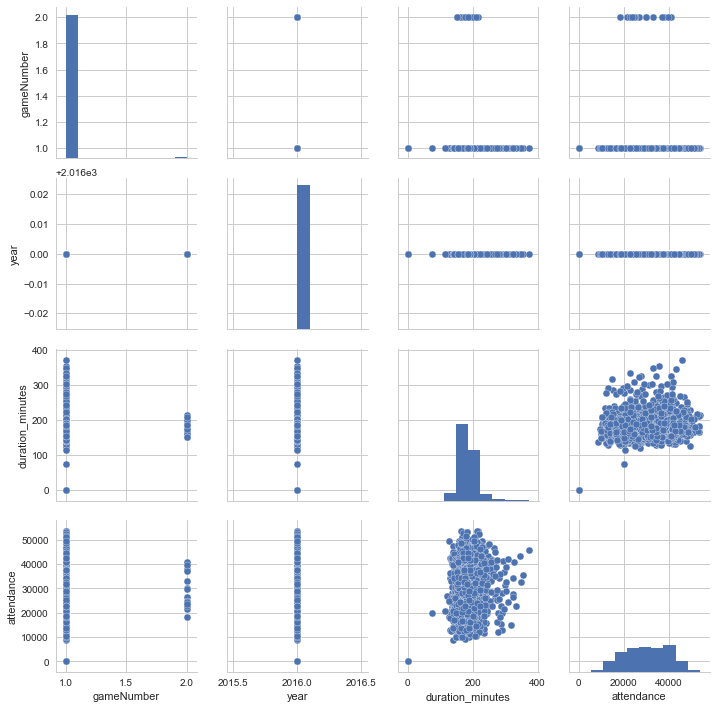

In [11]:
sns.pairplot(schedules_df)

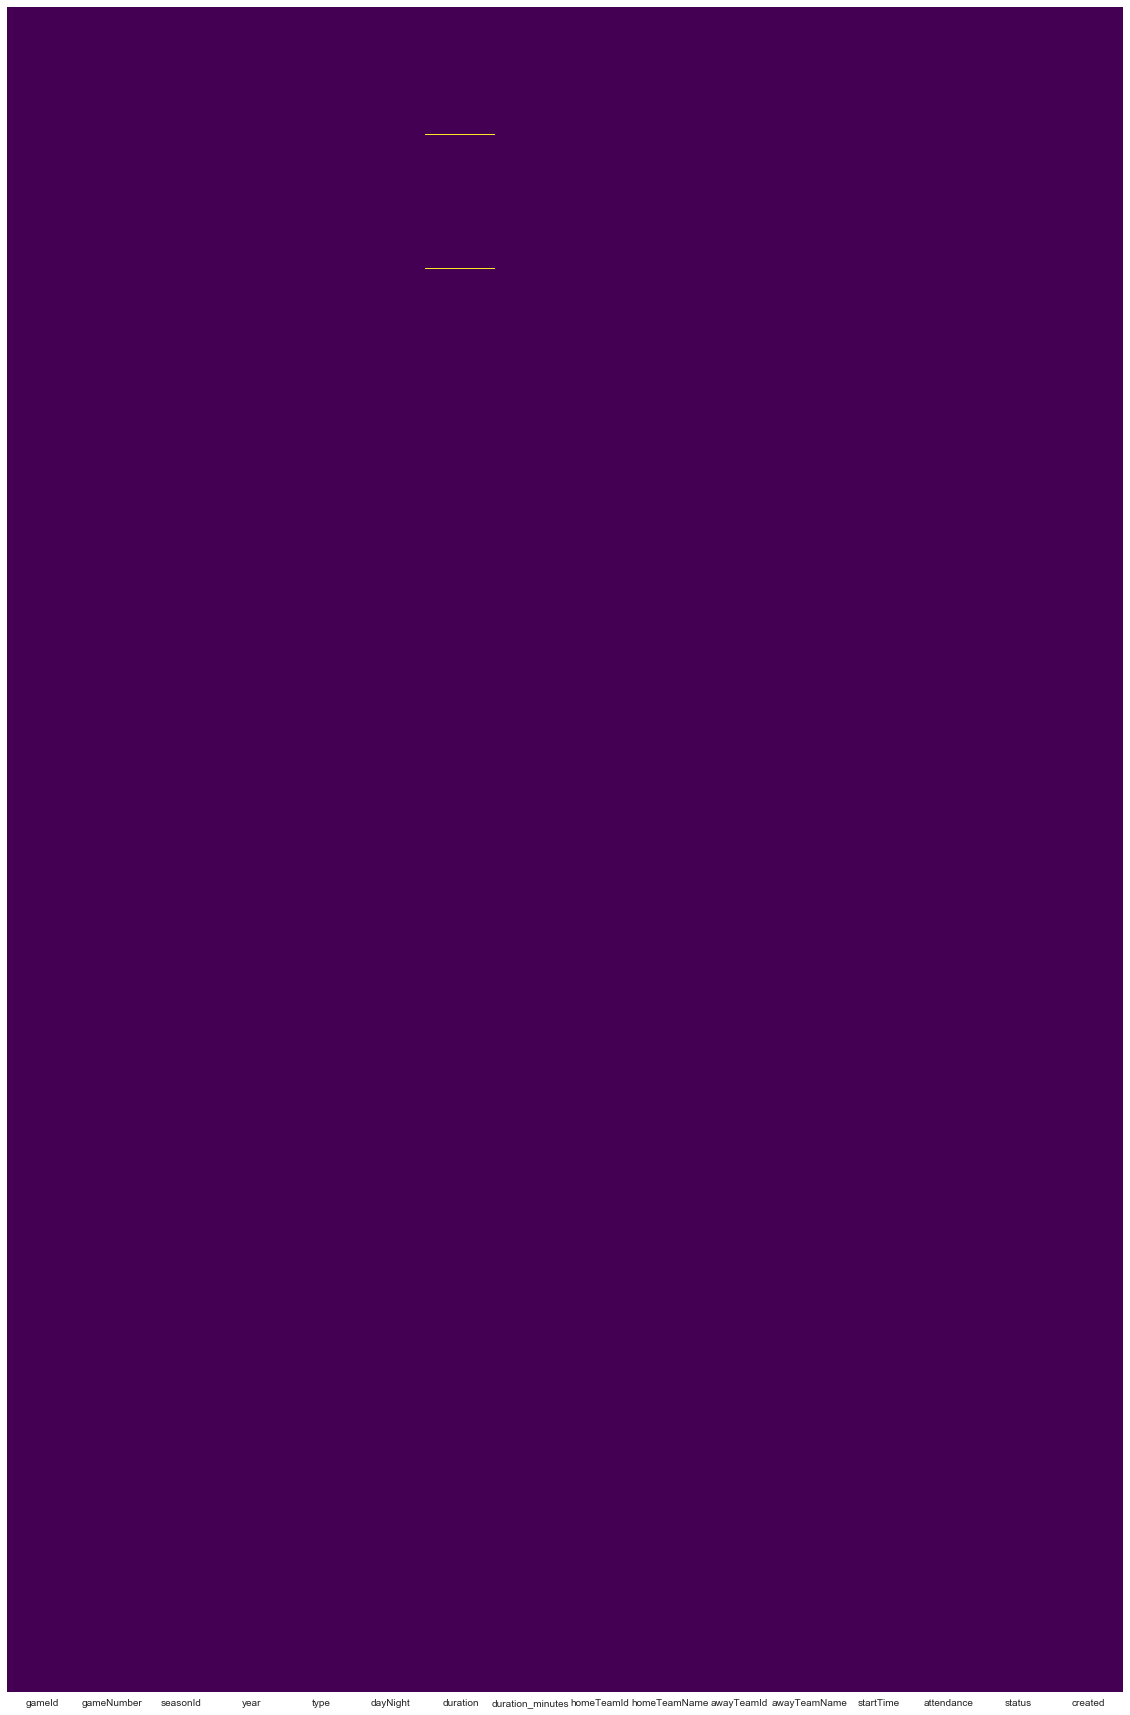

In [12]:
# To check for null values

plt.figure(figsize=(20, 31))
sns.heatmap(schedules_df.isnull(), yticklabels=False, cbar = False,  cmap ='viridis')

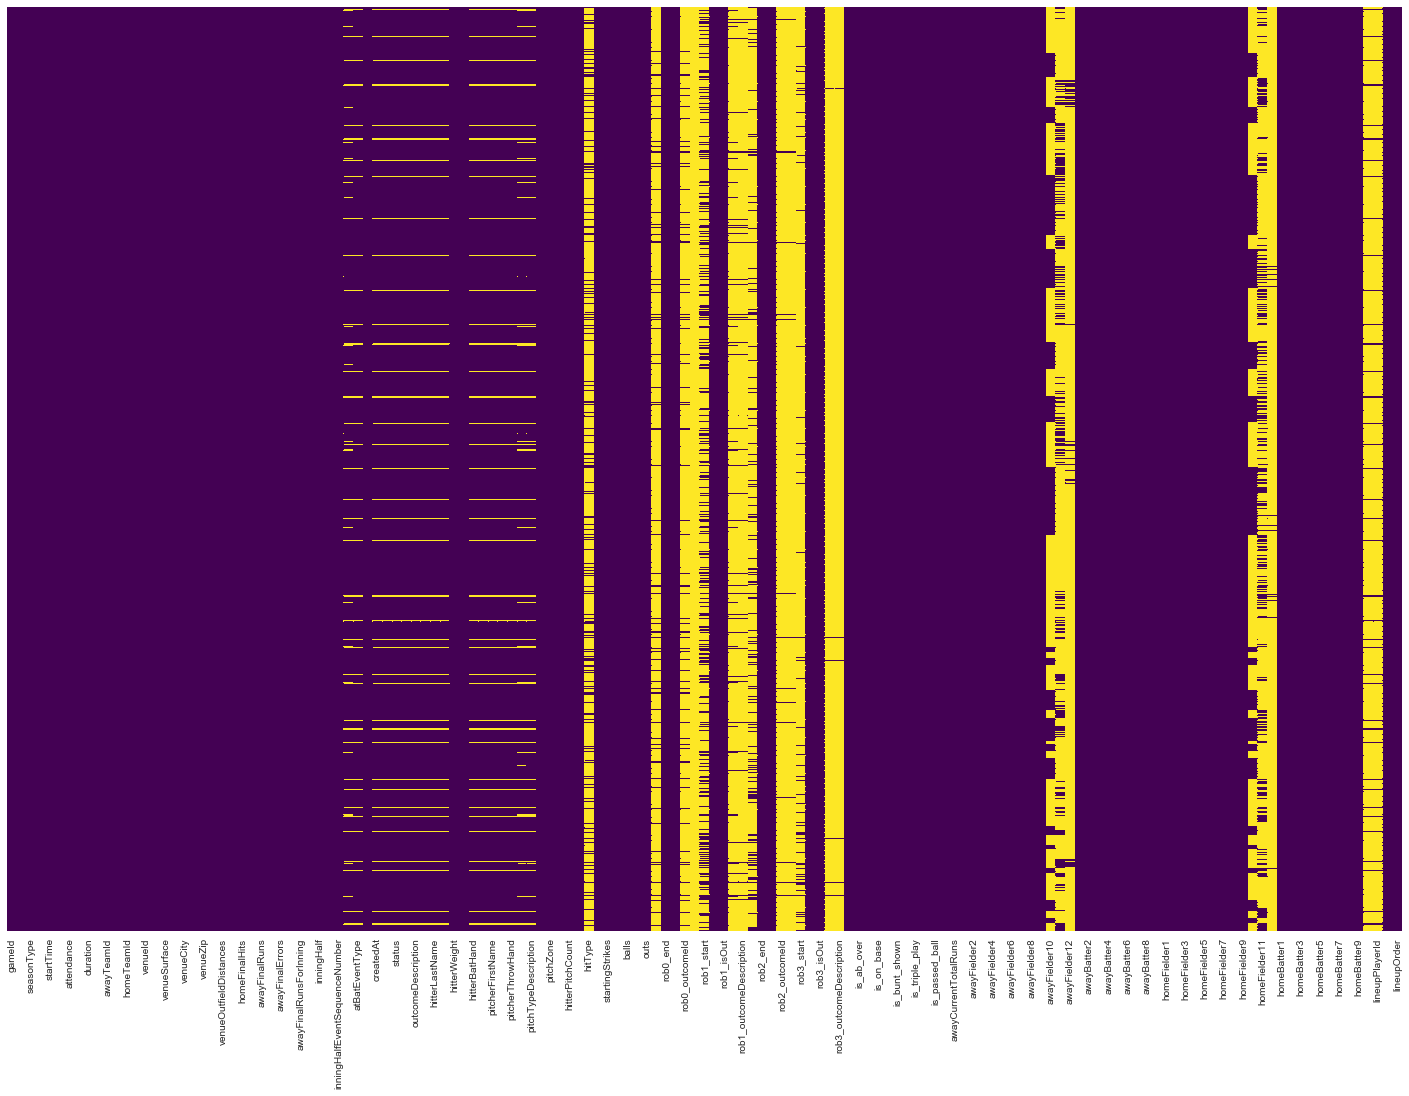

In [13]:
# To check for null values

plt.figure(figsize=(25, 17))
sns.heatmap(games_post_wide_df.isnull(), yticklabels=False, cbar = False, cmap ='viridis')

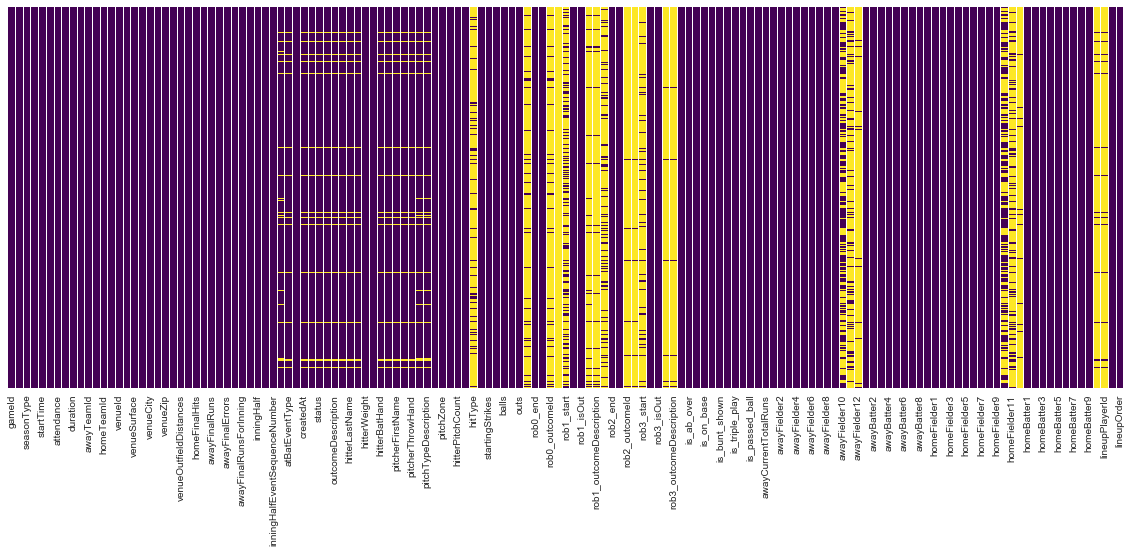

In [14]:
# To check for null values

plt.figure(figsize=(20, 7))
sns.heatmap(games_wide_df.isnull(), yticklabels=False, cbar = False, cmap ='viridis')